In [1]:
import perceval as pcvl
import sympy as sp
import numpy as np

<h3>Basic Single qubit gates </h3>

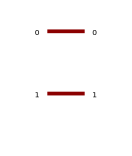

In [2]:
my_circuit = pcvl.Circuit(2)  # Creates circuit with 2 spatial modes
my_circuit.describe()
pcvl.pdisplay(my_circuit)

In [3]:
backend = pcvl.BackendFactory.get_backend("Naive")

simulator = backend(my_circuit)
print(simulator.probampli(pcvl.BasicState([1,0]), pcvl.BasicState([0,1])))  #note that it's the amplitude !

0j


In [4]:
p = pcvl.Processor("Naive", my_circuit)
states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

,0,1
0,1,0
1,0,1


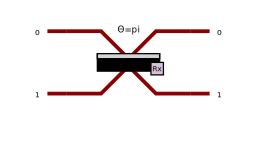

In [5]:
from perceval.components import BS

my_circuit1 = pcvl.Circuit(2)  # Creates circuit with 2 spatial modes
R = 0
my_circuit1.add((0,1), pcvl.BS(BS.r_to_theta(R)))
my_circuit1.describe()
pcvl.pdisplay(my_circuit1)

In [6]:
p = pcvl.Processor("Naive", my_circuit1)
states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

,0,1
0,0,1
1,1,0


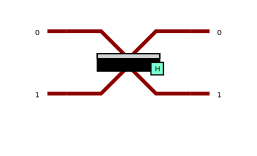

In [7]:
# Hadamard Gate
my_circuit2 = pcvl.Circuit(2)  # Creates circuit with 2 spatial modes
R = 0
my_circuit2.add((0,1), pcvl.BS.H())
my_circuit2.describe()
pcvl.pdisplay(my_circuit2)

In [8]:
p = pcvl.Processor("Naive", my_circuit2)
states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

,0,1
0,1/2,1/2
1,1/2,1/2


<h5>We start by describing the circuit as defined by the paper above- it is a circuit on six modes (labelled from 0 to 5 from top to bottom) consisting of five beam splitters. Modes 1 and 2 contain the control system while modes 3 and 4 encode the target system. Modes 0 and 5 are unoccupied ancillary modes.</h5>

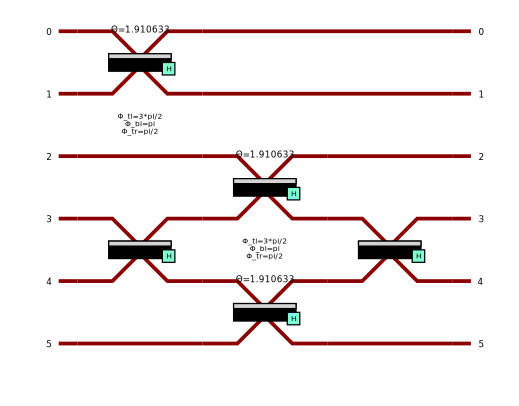

In [9]:
# CNOT Gate
cnot = pcvl.Circuit(6, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
pcvl.pdisplay(cnot)

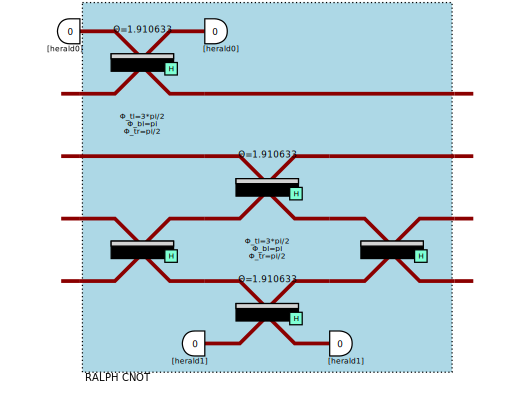

In [11]:
p = pcvl.Processor("Naive", cnot)
p.set_postprocess(lambda s: (s[1] or s[2]) and (s[3] or s[4]))
p.add_herald(0, 0)
p.add_herald(5, 0)

pcvl.pdisplay(p, recursive = True)

In [12]:
states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,0,1
11,0,0,1,0


<h2> Grover's algorithm </h2>

In [13]:
from tabulate import tabulate
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt